# Librerias y conexion a drive

In [1]:
%%capture
!pip install netcdf4
!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
import matplotlib.colors as colors

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Shapefiles y DEM

## Shapefiles

In [4]:
ruta_Sudamerica = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/shps/South_America.shp"
Sudamerica = gpd.read_file(ruta_Sudamerica)

In [5]:
Sudamerica.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

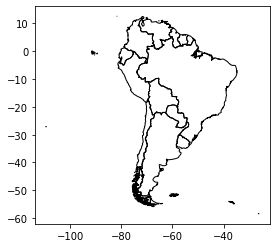

In [6]:
lugar = Sudamerica.plot(facecolor="none",edgecolor="black")

In [7]:
ruta_lago = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/lago_titicaca/lago_titicaca_sideteva_puno.shp"
lago_titicaca = gpd.read_file(ruta_lago)
lago_titicaca = lago_titicaca.to_crs("EPSG:4326")

## DEM

In [8]:
ruta_DEM = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/Spatial_co_variables/DEM.nc"
curvas = xr.open_dataset(ruta_DEM)
curvas

<xarray.Dataset>
Dimensions:    (longitude: 1422, latitude: 1982)
Coordinates:
  * longitude  (longitude) float64 -81.4 -81.39 -81.38 ... -67.21 -67.2 -67.19
  * latitude   (latitude) float64 1.22 1.21 1.2 1.19 ... -18.57 -18.58 -18.59
Data variables:
    crs        int32 ...
    DEM        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.3-13)
    date:         2021-06-17 23:11:50

In [9]:
curvas["crs"]

<xarray.DataArray 'crs' ()>
[1 values with dtype=int32]
Attributes:
    proj4:    +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0

In [10]:
curvas.rename({'DEM':'Altitude'})

<xarray.Dataset>
Dimensions:    (longitude: 1422, latitude: 1982)
Coordinates:
  * longitude  (longitude) float64 -81.4 -81.39 -81.38 ... -67.21 -67.2 -67.19
  * latitude   (latitude) float64 1.22 1.21 1.2 1.19 ... -18.57 -18.58 -18.59
Data variables:
    crs        int32 ...
    Altitude   (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.3-13)
    date:         2021-06-17 23:11:50

In [11]:
curvas = curvas.rename({'DEM':'Altitude'})

# Avance 1: una vista al DEM solo

(-18.5, -12.55)

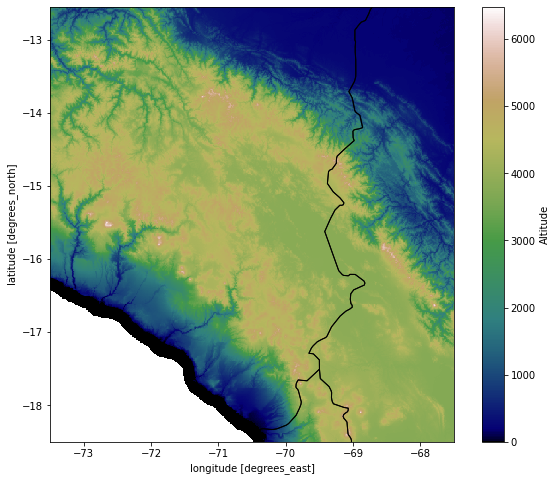

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
curvas.Altitude.plot(ax=ax,cmap="gist_earth")
lugar = Sudamerica.plot(ax=ax,facecolor="none",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

https://gidahatari.com/ih-es/como-crear-un-shapefile-de-punto-linea-poligono-con-python-y-fiona-tutorial

# Creacion de puntos shapefiles a partir de csv

In [13]:
ruta_csv = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/Stations_trabajo.csv"
estaciones = pd.read_csv(ruta_csv,header=0, delimiter = ";")
estaciones.head()

,Number,Name,X,Y,Altitude,Analyses,Type
0,1,Urubamba,-72.13,-13.30,3071,Climate+Trends,TEMP + PRECIP
1,2,Granja Kcayra,-71.88,-13.56,3219,Climate+Trends,TEMP + PRECIP
2,3,Ccatcca,-71.56,-13.61,3693,Climate+Trends,TEMP + PRECIP
3,8,Chuquibambilla,-70.73,-14.80,3910,Climate only,TEMP + PRECIP
4,10,La Angostura,-71.65,-15.18,4256,Climate only,TEMP + PRECIP


In [14]:
schema = {
    'geometry':'Point',
    'properties':[('Nombre','str'),("Tipo","str"),("Analisis","str"),("FID","int")]
}

In [15]:
pointShp = fiona.open('/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/estaciones.shp', mode='w', driver='ESRI Shapefile',
          schema = schema, crs = "EPSG:4326")

In [16]:
for index, row in estaciones.iterrows():
    rowDict = {
        'geometry' : {'type':'Point',
                     'coordinates': (row.X,row.Y)},
        'properties': {"Nombre" : row.Name, "Tipo": row.Type,"Analisis":row.Analyses,"FID":row.Number},
    }
    pointShp.write(rowDict)
pointShp.close()

In [17]:
ruta_puntos = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/estaciones.shp"
estaciones_shape = gpd.read_file(ruta_puntos)

In [18]:
estaciones_shape

,Nombre,Tipo,Analisis,FID,geometry
0,Urubamba,TEMP + PRECIP,Climate+Trends,1,POINT (-72.13000 -13.30000)
1,Granja Kcayra,TEMP + PRECIP,Climate+Trends,2,POINT (-71.88000 -13.56000)
2,Ccatcca,TEMP + PRECIP,Climate+Trends,3,POINT (-71.56000 -13.61000)
3,Chuquibambilla,TEMP + PRECIP,Climate only,8,POINT (-70.73000 -14.80000)
4,La Angostura,TEMP + PRECIP,Climate only,10,POINT (-71.65000 -15.18000)
5,Sibayo,TEMP + PRECIP,Climate+Trends,11,POINT (-71.45000 -15.49000)
6,Chivay,TEMP + PRECIP,Climate+Trends,12,POINT (-71.60000 -15.64000)
7,Imata,TEMP + PRECIP,Climate+Trends,13,POINT (-71.09000 -15.84000)
8,Pampahuta,TEMP + PRECIP,Climate+Trends,14,POINT (-70.68000 -15.49000)
9,Lampa,TEMP + PRECIP,Climate+Trends,15,POINT (-70.37000 -15.36000)


https://stackoverflow.com/questions/50270565/geopandas-add-labels-to-points-on-plot

## Colores puntos

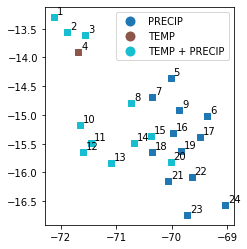

In [19]:
ax = estaciones_shape.plot(column="Tipo",legend=True, marker="s")
for x, y, label in zip(estaciones_shape.geometry.x, estaciones_shape.geometry.y, estaciones_shape.FID):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

https://gis.stackexchange.com/questions/417574/showing-the-legend-in-geopandas-when-color-is-given-by-value

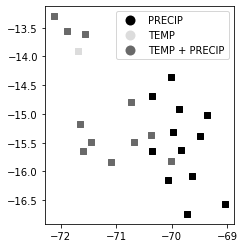

In [20]:
color_dict = {"TEMP + PRECIP":"black", "TEMP":"gainsboro", "PRECIP":"dimgray"}
estaciones_shape.plot(column="Tipo",legend=True, marker="s",
                      cmap=colors.ListedColormap(list(color_dict.values())))

# FIGURA RESULTADO

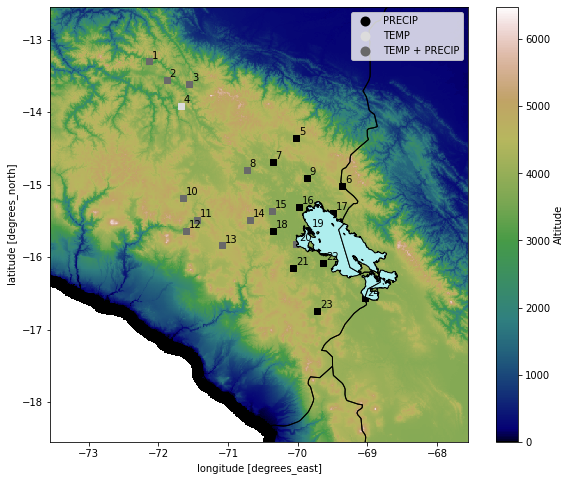

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
curvas.Altitude.plot(ax=ax,cmap="gist_earth")
lugar = Sudamerica.plot(ax=ax,facecolor="none",edgecolor="black")
color_dict = {"TEMP + PRECIP":"black", "TEMP":"gainsboro", "PRECIP":"dimgray"}
estaciones = estaciones_shape.plot(ax=ax,column="Tipo",legend=True, marker ="s",
                                   cmap=colors.ListedColormap(list(color_dict.values())))
lago_titicaca.plot(ax=ax,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.55, -18.55, -67.55, -12.55
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

for x, y, label in zip(estaciones_shape.geometry.x, estaciones_shape.geometry.y, estaciones_shape.FID):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")